# Secant Method

In [1]:
using Plots; pyplot()
using LaTeXStrings
using Printf

In [2]:
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    guidefont=font(14), legendfont=font(12),titlefont=font(12))

In [8]:
function secant(f, p0, p1, n_max, rel_tol; verbose = true)
    
    converged = false;
    
    p = p0;
    for i in 1:n_max

        p = p1 - f(p1) * (p1-p0)/(f(p1)-f(p0));
        
        if verbose
            @printf(" %d: p = %.12g, f(p) = %g\n", i, p, f(p));
        end

        
        if (i>1)
            if abs(p-p1)/abs(p1)< rel_tol
                converged = true;
                break
            end
        end
        p0 = p1;
        p1 = p;

    end
    
    if !converged
        @printf("ERROR: Did not converge after %d iterations\n", n_max);
    end

    return p
    
end

secant (generic function with 1 method)

## Example 
Compute $\sqrt{2}$ by solving $f(x) = 0$ with
$$
f(x) = x^2-2.
$$

In [10]:
f = x-> x^2 - 2;
p0 = 1;
p1 = 2;
rel_tol = 1e-8;
n_max = 100;

p = secant(f, p0, p1, n_max, rel_tol);

 1: p = 1.33333333333, f(p) = -0.222222
 2: p = 1.4, f(p) = -0.04
 3: p = 1.41463414634, f(p) = 0.00118977
 4: p = 1.41421143847, f(p) = -6.00729e-06
 5: p = 1.41421356206, f(p) = -8.93146e-10
 6: p = 1.41421356237, f(p) = 8.88178e-16


### Visualization

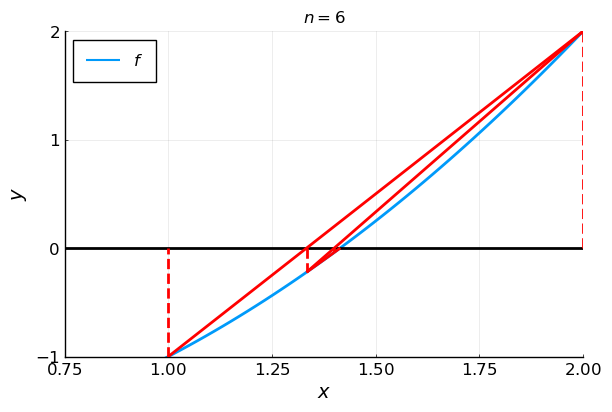

In [11]:
n_max = 5;
p0_vals = zeros(n_max+1);
p1_vals = zeros(n_max+1);
p0 = 1;
p1 = 2;

p0_vals[1] = p0;
p1_vals[1] = p1;
for i in 1:n_max
    p = p1 - f(p1) * (p1-p0)/(f(p1)-f(p0));
    p0 = p1;
    p1 = p;
    
    p0_vals[i+1] = p0;
    p1_vals[i+1] = p1;
end

xx = LinRange(0,2,100);

ff = f.(xx);
plot(xx, ff, label=L"$f$", legend=:topleft)
plot!(xx, 0 *xx,label="", color=:black)
p0 = p0_vals[1];
plot!([p0, p0], [f(p0), 0], label="", color=:red, ls=:dash)
anim = @animate for i=1:n_max+1
    
    p0 = p0_vals[i];
    p1 = p1_vals[i];    
    
    plot!([p1, p1], [0, f(p1)], label="", color=:red, ls=:dash)
    plot!([p0, p1],[f(p0), f(p1)],label="", color=:red)
    xlims!(0.75,2)
    ylims!(-1, 2)
    
    xlabel!(L"$x$");
    ylabel!(L"$y$")
    title!(latexstring(@sprintf("\$n = %d\$", i)))
end;



┌ Info: Saved animation to 
│   fn = /Users/grs53/code/Math_300_2021/notebooks/tmp.gif
└ @ Plots /Users/grs53/.julia/packages/Plots/yfzIY/src/animation.jl:114


Plots.AnimatedGif("/Users/grs53/code/Math_300_2021/notebooks/tmp.gif")
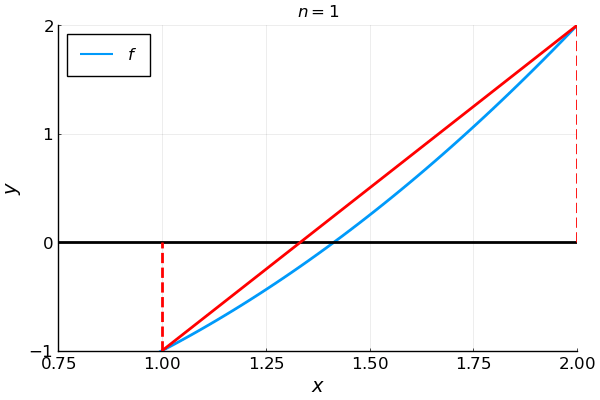

In [12]:
gif(anim,  fps = 1)

## Example
Find a root of
$$
f(x) = \cos(x) - x
$$

In [13]:
f = x-> cos(x) -x;
p0 = 0;
p1 = 1;
rel_tol = 1e-8;
n_max = 100;

p = secant(f, p0, p1, n_max, rel_tol);

 1: p = -0.380758745638, f(p) = 1.30914
 2: p = 0.923655106884, f(p) = -0.320747
 3: p = 0.666958539383, f(p) = 0.118748
 4: p = 0.736315965505, f(p) = 0.00463168
 5: p = 0.739130992858, f(p) = -7.6752e-05
 6: p = 0.739085105134, f(p) = 4.69964e-08
 7: p = 0.739085133215, f(p) = 4.75842e-13
 8: p = 0.739085133215, f(p) = 0


In [ ]:
xx = LinRange(0,π/2,100);
plot(xx, f.(xx), label=L"$f(x)$")
plot!(xx, 0*xx, label="")
scatter!([p], [f(p)],label="Root")

# Example where Secant can Fail
$$
f(x) = x^3 - x +2
$$

In [35]:
f = x-> x^3-x+2;
p0 = 0;
p1 = 3;
# p0 = 0;
# p1 = 1;



rel_tol = 1e-8;
n_max = 100;

p = secant(f, p0, p1, n_max, rel_tol);

 1: p = -0.25, f(p) = 2.23438
 2: p = -0.555555555556, f(p) = 2.38409
 3: p = 4.31023622047, f(p) = 77.7659
 4: p = -0.709445086768, f(p) = 2.35237
 5: p = -0.86602386291, f(p) = 2.21651
 6: p = -3.42046993443, f(p) = -34.5977
 7: p = -1.01982180112, f(p) = 1.95917
 8: p = -1.14847822853, f(p) = 1.63363
 9: p = -1.79411098663, f(p) = -1.98083
 10: p = -1.4402852028, f(p) = 0.452527
 11: p = -1.50608537202, f(p) = 0.0898422
 12: p = -1.52238503767, f(p) = -0.00598009
 13: p = -1.52136780676, f(p) = 7.07307e-05
 14: p = -1.52137969762, f(p) = 5.45733e-08
 15: p = -1.5213797068, f(p) = -4.99156e-13


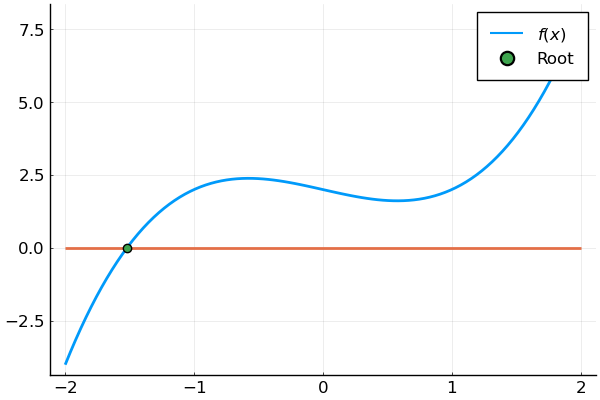

In [36]:
xx = LinRange(-2,2,100);
plot(xx, f.(xx), label=L"$f(x)$")
plot!(xx, 0*xx, label="")
scatter!([p], [f(p)],label="Root")